<a href="https://colab.research.google.com/github/joykangangi/DataSciencePlayground/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#31394d'>Practical Exercise: Linear Regression</font>

In this notebook, we are going to train a simple linear regression model using the [`scikit-learn`](https://scikit-learn.org) library. Recall that linear regression is a *supervised learning* technique that is suitable for a *continuous/numerical* outcome variable.  

We begin by importing modules for data wrangling:

<!-- 
Even though its name is scikit-learn, it is imported as `sklearn`. It has many submodules.
For example, the `datasets` submodule has a group of simple datasets that can be used to evaluate models without having to use external files.

The Boston Housing dataset is available as a scikitlearn dataset.-->

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## <font color='#31394d'> Get and Explore the Data </font>

We'll be using is the [Boston Housing](https://www.kaggle.com/c/boston-housing) dataset from Kaggle. This dataset consists of information about houses in the Boston area. Our goal is to **predict the typical price of a house**.

We import the data from the ``sklearn`` module as follows:

In [4]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

`sklearn` datasets behave like a dictionary. Let's see what this dictionary contains:

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The `DESCR` key includes a description of the dataset:

In [7]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The `target` key holds the target/outcome variable; in this case, the median house value in thousands of dollars.

In [8]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

The names of the features/independent variables are stored under the `feature_names` key:

In [9]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Finally, the values of the features are stored under the `data` key:

In [10]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Let's put the Boston data into a pandas dataframe:

In [11]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

boston_df["PRICE"] = boston["target"]

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## <font color='#31394d'> Train/Test Split </font>

Before we create the regression model, we need to split the data into training and test subsets. This way, we train on one portion of the data (the "training set") and measure model performance on the other portion (the "test" set). Usually, the training set is larger than the test set.

<!--One way to avoid method overfitting and making sure that the model doesn't memorize the dataset is to do a train test split.-->
![title](media/train_test_split.png) 


![title](media/train_test.png)

We can use the `train_test_split` function from the `sklearn` module to easily split the dataset into training and test subsets. 

`train_test_split` works both with numpy arrays and pandas dataframes. If we pass it with a numpy array, it will return 4 different arrays: an X,y pair for training and another X,y pair for the test dataset. If we pass it a pandas dataframe, it will split the dataframe into two (training and test dataframes). 

We use the argument `test_size` to define the % size of the test dataset.

The full dataset is divided row-wise into training and test sets *at random*. This means that if we run the `train_test_split` twice, we will get different datasets. In order to make sure that we get the same splits again and again, we can fix the *random seed*, that is, the number that numpy uses to start its random number generation (used to calculate the splits). We can use the argument `random_state` to set the random seed for `train_test_split`.

In [12]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(boston_df, test_size=0.2, random_state=12345)


print('Training set has', train_df.shape[0], 'rows')
print('Test set has', test_df.shape[0], 'rows')
print('Train set has a shape', train_df.shape)
print('Test set has a shape', test_df.shape)

Training set has 404 rows
Test set has 102 rows
Train set has a shape (404, 14)
Test set has a shape (102, 14)


## <font color='#31394d'> Model Fitting </font>

The algorithms for linear regression are in the `linear_model` submodule of `sklearn`. Let's import the `LinearRegression` class and create (instantiate) an *estimator* object. Note that this is the standard procedure for any machine learning algo available in `sklearn`. 

In [13]:
from sklearn.linear_model import LinearRegression
#algo + training data = model
model = LinearRegression()

We train the model (i.e. estimate its parameters) on the training data with the `fit` method. The `fit` method follows the same structure for pretty much every model in scikit-learn. We pass as arguments the features `X` and outcome variable `y`. The find out more, recall that you can type `?model.fit`.

Let's fit a simple linear model with house price as the outcome and number of rooms as the feature:

In [14]:
# train['RM']  is a pandas series | Changing it into 2d from 1d?
# train[['RM']] is a pandas dataframe
# NB: the fit method expects X to be a dataframe, not a series 
# X is the features, y is the the label

model.fit(X=train_df[["RM"]], y=train_df["PRICE"])

LinearRegression()

Now that the linear regression model is trained (fitted), it has two additional attributes: `coef_` is an array containing the estimated coefficients/slopes for each feature, and `intercept_` contains the estimated intercept term.

In [15]:
model.intercept_ # theta0 estimate

-38.140815462868034

In [16]:
model.coef_ # theta1 estimate

array([9.63798633])

###### For Num of rooms vs Price target
- y = c + mx
- f(X) = -38.14 + 9.63798x 

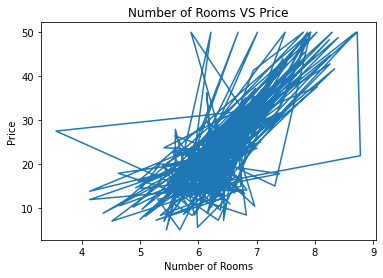

In [17]:
# plot graph 
import matplotlib.pyplot as plt
plt.plot(train_df['RM'], train_df['PRICE'])
plt.title("Number of Rooms VS Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()

In [18]:
print('The estimated regression function is:\n\nave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* rooms')

The estimated regression function is:

ave price = -38.14 + 9.64 * rooms


🚀 <font color='#d9c4b1'> Exercise: </font> Does the estimated slope make sense to you?
    
🚀 <font color='#d9c4b1'> Exercise: </font> Does the estimated intercept make sense to you? Hint: How would you interpret it?

### My Answers:
1. The slope and intercept are okay. The gradient is positive showing there is a positive relation between the House Price and the Number of Rooms. 

In practice, we would have *first* produced some plots and done some exploratory analysis before assuming a linear relationship between price and the number of rooms. 

Let's see what how well our model describes the training data:

In [ ]:
#plt.gca().set(xlim=(0,2.6))
#sns.regplot(x=train_df[['RM']], y=train_df['PRICE'], scatter = False)
#sns.regplot(x=train_df[['RM']], y=train_df['PRICE'], x_estimator= np.mean)

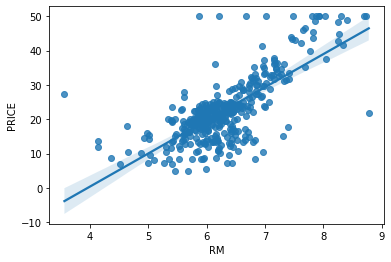

In [19]:
#Line of best fit
sns.regplot(x=train_df[['RM']], y=train_df['PRICE'])

## <font color='#31394d'> Model Evaluation </font>

Once the model is trained, we can use the estimator object's `predict` method to get predicted house prices for the test set:

In [20]:
y_hat = model.predict(test_df[['RM']])
y_hat

array([21.26773226, 28.08178859, 18.7714938 , 22.01949519, 18.97389151,
       17.34507182, 23.7061428 , 23.37845126, 22.09659908, 13.53806722,
       26.69391856, 19.71601646, 28.33237623, 18.11611073, 18.99316748,
       21.56650983, 19.87022424, 29.72024627, 11.54300405, 17.36434779,
       21.07497253, 23.32062334, -0.90927428, 27.21436982, 31.72494742,
       25.00727095, 20.14008786, 25.13256477, 16.50656701, 26.90595426,
       25.80722382, 24.45790573,  9.69251068, 11.84178163, 16.80534459,
       23.7061428 , 24.94944303, 18.42452629, 28.8528275 , 19.77384438,
       25.80722382, 15.49457845, 23.01220778, 18.56909608, 27.98540873,
       20.3232096 , 24.61211351, 25.40242839, 16.29453131, 13.89467272,
       20.86293683, 20.48705536, 23.04112174, 23.31098536, 31.5996536 ,
       21.00750663, 24.10130024, 39.62809621, 15.77408005, 32.0911909 ,
       20.93040274, 20.78583294, 12.67064845, 22.91582792, 24.1302142 ,
       30.35635336, 17.63421141, 37.33425546, 15.76444206, 29.55

Let's compute some performance metrics. We can either do this by hand...

In [21]:
np.mean((test_df['PRICE'] - y_hat)**2) # mean squared error 

48.20056297353019

...Or we can use the functions available scikit-learn's `metrics` submodule. These functions take the actual values and predicted values of the outcome variable as arguments:

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mean_squared_error(y_true=test_df['PRICE'], y_pred=y_hat)

48.20056297353019

In [24]:
mean_absolute_error(y_true=test_df['PRICE'], y_pred=y_hat)

4.199936841471352

The magnitudes of the MSE and MAE are dependent on how the outcome variable is measured. They are therefore not comparable across datasets, but are useful for model and feature selection on a given dataset.

Let's visualize the actual price against the predicted price. If the model was perfect, the predicted values would equal the observed values, and all the points would lie on the diagonal line through the origin:

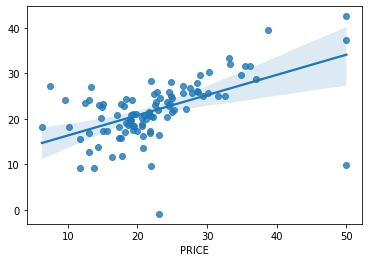

In [25]:
sns.regplot(x=test_df[['PRICE']], y=y_hat) 

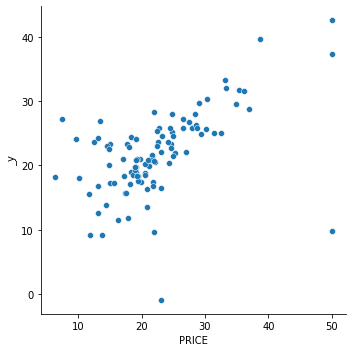

In [26]:
sns.relplot(x=test_df['PRICE'], y=y_hat, kind="scatter")

🚀 <font color='#d9c4b1'> Exercise: </font> Regress price against age and determine if this model is better than the one that uses the number of rooms as a feature. 

🚀 <font color='#d9c4b1'> Advanced Exercise: </font> Write a function that, for any single feature, regresses price against that feature on the training set, and computes the evaluation metrics on the test set. Then use your function to determine which feature is best at predicting price. 

In [27]:
# EXERCISE
model.fit(X=train_df[["AGE"]], y=train_df["PRICE"])


LinearRegression()

In [28]:
model.coef_

array([-0.1310044])

In [29]:
model.intercept_

31.652068729737714

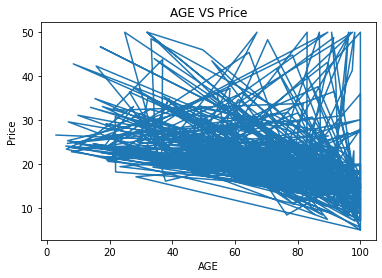

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_df['AGE'], train_df['PRICE'])
plt.title("AGE VS Price")
plt.xlabel("AGE")
plt.ylabel("Price")
plt.show()

In [31]:
print('The estimated regression function is:\n\nave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* age')

The estimated regression function is:

ave price = 31.65 + -0.13 * age


### The Price vs Age linear function is: f(X) = 31.65 - 0.13*age
### The slope is negative showing that the variables are inversely related. As the age increases, the price reduces. 

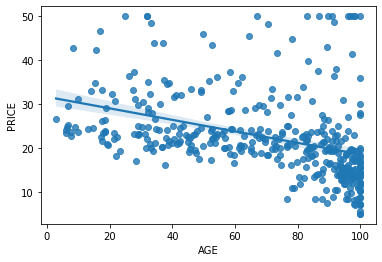

In [32]:
sns.regplot(x=train_df[['AGE']], y=train_df['PRICE'])

In [33]:
#Predict House Price given the AGE 
y_hat_age = model.predict(test_df[['AGE']])
y_hat_age

array([19.69136732, 25.44246033, 24.68263483, 23.17608427, 22.35075657,
       18.55162907, 22.99267812, 26.97521177, 19.52106161, 19.04944578,
       21.18481744, 19.27215325, 24.53853   , 23.83110625, 20.09748095,
       24.52542956, 23.09748163, 30.34202476, 18.55162907, 25.33765682,
       27.43372716, 19.29835413, 18.55162907, 22.31145525, 28.78307244,
       28.84857464, 20.01887831, 28.65206805, 27.87914211, 19.52106161,
       20.84420601, 19.28525369, 19.67826688, 19.36385633, 19.20665106,
       30.78743971, 27.3158232 , 25.58656517, 28.8354742 , 20.79180425,
       27.76123815, 22.40315833, 29.01888036, 29.22848739, 27.99704607,
       18.55162907, 28.88787596, 22.59966493, 20.17608359, 19.16734974,
       18.90534094, 25.9271766 , 20.37259018, 20.07128007, 26.26778803,
       20.20228447, 18.69573391, 21.69573459, 26.83110694, 27.18481881,
       19.07564666, 21.19791788, 19.33765545, 18.78743699, 19.42935853,
       26.85730782, 27.577832  , 24.63023307, 21.63023239, 29.58

In [34]:
mean_squared_error(y_true = test_df['PRICE'], y_pred = y_hat_age)

58.070195147093244

In [35]:
mean_absolute_error(y_true=test_df['PRICE'], y_pred=y_hat_age)

5.380907587002128

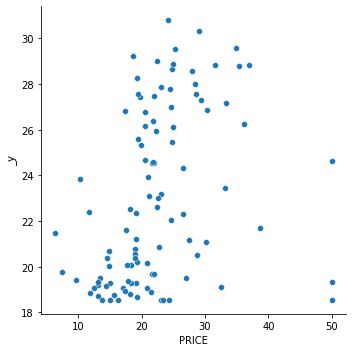

In [36]:
sns.relplot(x =test_df['PRICE'], y=y_hat_age, kind='scatter')

### Room numbers has a better model compared to AGE. Because AGE has a larger MSE and MAE than Room Numbers. 

In [57]:
# Advanced Exercise: 
# Write a function that, for any single feature, regresses price against that feature on the training set,
# and computes the evaluation metrics on the test set.
# Then use your function to determine which feature is best at predicting price.

def regress_feature(feature: str):
  model.fit(X=train_df[[feature]], y=train_df["PRICE"])  
  print("The feature is: ",feature)

  print("The coefficient is : ",model.coef_)
  print("The intercept is: ",model.intercept_)
  print('The estimated regression function is: ave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* ', feature,"\n")
 
  plt.figure(figsize = (7,7))
  plt.subplot()
  sns.regplot(x=train_df[[feature]], y=train_df['PRICE'])
  plt.title("Trained Linear Regression of Housing Prices on {} ".format(feature)) 

  plt.subplot()
  sns.relplot(x =test_df['PRICE'], y=y_hat, kind='scatter')
  plt.title("ReLational Plot for Predicted VS True Price")  
  

The feature is:  CRIM
The coefficient is :  [-0.41846633]
The intercept is:  24.161688799210427
The estimated regression function is: ave price = 24.16 + -0.42 *  CRIM 



<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature CRIM are:
 [23.99107589 24.14320514 22.13812371 21.7245367  17.64378275  2.76307814
 24.14208784 24.15308932 23.62878866 22.62247757 24.09947959 22.31111351
 24.11428075 19.03664794 24.08998878 24.11652373 24.06162513 24.13841789
 12.17020128 22.83782871 24.14267369 24.06757991 18.50310336 24.11384973
 24.15620271 23.97681874 23.76173123 24.1437073  24.08678751 21.35054915
 23.95539327 23.83821851 22.61463969 23.18624796 23.67973276 24.12475496
 24.1338022  24.14734796 24.12374227 24.11253156 24.15540762 20.48248259
 24.13463077 24.1313751  24.14703411 23.59975547 24.139259   24.13548025
 19.11992274 24.05545275 23.46845747 24.06082586 20.60801831 22.6162466
 24.13861038 24.07313714 24.01938514 24.11112551 24.10496987 24.14490411
 23.57004018 21.77988305 23.13783559 23.92827665 18.12706952 24.14216316
 24.14336416 24.13824632 24.07545126 24.14763252 22.9984612  24.13768976
 24.1478543  23.90445754 21.70443357 24.13298201 24.14656124 19.62794086
 2

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature ZN are:
 [20.78250318 32.36189818 20.78250318 20.78250318 20.78250318 20.78250318
 20.78250318 34.84319711 20.78250318 20.78250318 20.78250318 20.78250318
 25.74510104 20.78250318 20.78250318 20.78250318 20.78250318 32.36189818
 20.78250318 20.78250318 20.78250318 22.85025229 20.78250318 20.78250318
 35.67029675 20.78250318 20.78250318 29.46704943 20.78250318 20.78250318
 20.78250318 20.78250318 20.78250318 20.78250318 20.78250318 20.78250318
 20.78250318 20.78250318 28.22639997 22.85025229 34.01609747 20.78250318
 32.36189818 30.7076989  34.01609747 20.78250318 24.25632168 20.78250318
 20.78250318 20.78250318 20.78250318 20.78250318 20.78250318 20.78250318
 26.24136082 20.78250318 20.78250318 20.78250318 22.85025229 34.01609747
 20.78250318 20.78250318 20.78250318 20.78250318 20.78250318 34.01609747
 34.01609747 20.78250318 24.42174161 33.18899783 20.78250318 20.78250318
 20.78250318 20.78250318 20.78250318 20.78250318 34.01609747 20.78250318
 24

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature INDUS are:
 [25.98985969 28.72420922 17.77300126 17.77300126 17.77300126 17.77300126
 27.91633323 29.75994768 16.75107264 17.77300126 24.36029785 17.77300126
 26.86678492 17.77300126 23.35908401 24.36029785 23.58004155 28.72420922
 17.77300126 17.77300126 28.03371692 24.83673754 17.77300126 24.36029785
 29.42851138 25.98985969 24.65030462 26.59749292 23.58004155 17.77300126
 23.43503816 24.65030462 17.77300126 16.75107264 24.65030462 22.80669016
 27.47441815 26.68725692 27.89561846 24.83673754 28.88302245 17.77300126
 28.72420922 29.10397999 26.85297508 16.75107264 26.37653539 22.03333878
 17.77300126 25.49961016 16.75107264 25.17507877 17.77300126 17.77300126
 28.76563876 24.36029785 15.15603542 28.27538923 26.07962369 29.22136368
 16.75107264 17.77300126 16.75107264 15.15603542 17.77300126 29.22136368
 27.94395292 28.57230092 26.22462708 28.23395969 16.75107264 27.17060154
 26.68725692 25.98985969 17.77300126 28.27538923 26.85297508 17.77300126


<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature CHAS are:
 [28.37741935 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 28.37741935 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 28.37741935 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239 22.10107239
 

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature NOX are:
 [24.30496213 28.14845271 21.57500621 23.40695031 21.68276762 21.07211959
 24.95153064 27.78924798 20.78475581 14.85787781 23.83799598 21.53908573
 27.14267947 21.53908573 22.86814322 23.83799598 21.50316526 28.14845271
 21.07211959 18.98873217 25.99322435 23.69431409 19.85082352 23.83799598
 28.04069129 24.41272355 23.19142748 27.96885034 21.50316526 16.90534475
 22.97590464 23.19142748 16.72574239 11.22991007 23.19142748 27.68148656
 24.19720071 24.01759835 26.81939522 23.69431409 26.89123616 21.53908573
 28.14845271 27.75332751 27.75332751 20.78475581 26.74755427 21.93421093
 20.46147155 26.42427002 11.22991007 24.80784875 21.53908573 16.90534475
 25.56217867 23.83799598 20.10226682 26.53203144 27.82516845 28.00477082
 11.22991007 21.57500621 11.22991007 20.10226682 15.93549199 28.00477082
 28.22029365 24.98745111 27.03491805 27.14267947 11.22991007 26.38834955
 24.01759835 24.30496213 17.62375421 26.53203144 27.75332751 18.12664083
 2

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature RM are:
 [21.26773226 28.08178859 18.7714938  22.01949519 18.97389151 17.34507182
 23.7061428  23.37845126 22.09659908 13.53806722 26.69391856 19.71601646
 28.33237623 18.11611073 18.99316748 21.56650983 19.87022424 29.72024627
 11.54300405 17.36434779 21.07497253 23.32062334 -0.90927428 27.21436982
 31.72494742 25.00727095 20.14008786 25.13256477 16.50656701 26.90595426
 25.80722382 24.45790573  9.69251068 11.84178163 16.80534459 23.7061428
 24.94944303 18.42452629 28.8528275  19.77384438 25.80722382 15.49457845
 23.01220778 18.56909608 27.98540873 20.3232096  24.61211351 25.40242839
 16.29453131 13.89467272 20.86293683 20.48705536 23.04112174 23.31098536
 31.5996536  21.00750663 24.10130024 39.62809621 15.77408005 32.0911909
 20.93040274 20.78583294 12.67064845 22.91582792 24.1302142  30.35635336
 17.63421141 37.33425546 15.76444206 29.5564005   9.1142315  25.75903388
 20.25574369 25.64337805 23.59048696 33.33449114 25.75903388 27.22400781
 22.0

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature AGE are:
 [19.69136732 25.44246033 24.68263483 23.17608427 22.35075657 18.55162907
 22.99267812 26.97521177 19.52106161 19.04944578 21.18481744 19.27215325
 24.53853    23.83110625 20.09748095 24.52542956 23.09748163 30.34202476
 18.55162907 25.33765682 27.43372716 19.29835413 18.55162907 22.31145525
 28.78307244 28.84857464 20.01887831 28.65206805 27.87914211 19.52106161
 20.84420601 19.28525369 19.67826688 19.36385633 19.20665106 30.78743971
 27.3158232  25.58656517 28.8354742  20.79180425 27.76123815 22.40315833
 29.01888036 29.22848739 27.99704607 18.55162907 28.88787596 22.59966493
 20.17608359 19.16734974 18.90534094 25.9271766  20.37259018 20.07128007
 26.26778803 20.20228447 18.69573391 21.69573459 26.83110694 27.18481881
 19.07564666 21.19791788 19.33765545 18.78743699 19.42935853 26.85730782
 27.577832   24.63023307 21.63023239 29.58219926 18.83983875 24.30272208
 26.76560474 21.06691349 19.07564666 23.46429394 28.58656585 19.75686952
 2

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature DIS are:
 [21.72862565 27.4251257  21.85292896 22.17697565 21.56225229 19.78005508
 21.78142178 29.04571669 20.23936952 20.60310269 21.406605   21.12355576
 25.64733811 20.47677334 21.03154986 21.406605   20.9671934  27.4251257
 19.99028618 21.7506737  25.09613696 25.65997105 19.89637343 21.49992186
 28.46054962 22.11845894 23.40356209 26.81659963 21.43139415 20.86529567
 22.04981205 23.40511141 20.18442817 19.91901736 22.60959407 24.39739266
 21.82909323 24.33041428 25.8185978  25.51695669 28.04032578 20.55531206
 27.4251257  30.86044965 24.19407392 20.1903871  26.21772703 21.05002254
 20.42147446 25.09184653 20.02437127 24.55065638 20.54244077 21.15549563
 22.88942549 21.33140328 20.6208603  22.26159247 25.84028831 26.80682698
 20.18097199 22.32201604 20.16547877 20.61156437 20.48273227 26.80682698
 25.97555605 21.90882374 27.57660174 24.53301794 19.70008623 23.38485104
 23.831175   21.99570496 20.09444831 22.26159247 24.19407392 20.26451621
 23

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


The prediced House price given feature RAD are:
 [23.21138435 24.4792676  16.44934036 16.44934036 16.44934036 16.44934036
 25.74715085 25.74715085 24.4792676  16.44934036 24.4792676  16.44934036
 24.05663985 16.44934036 24.05663985 24.4792676  24.05663985 24.4792676
 16.44934036 16.44934036 24.90189535 24.4792676  16.44934036 24.4792676
 24.4792676  23.21138435 24.90189535 24.05663985 24.05663985 16.44934036
 24.90189535 24.90189535 16.44934036 24.4792676  24.90189535 24.90189535
 24.4792676  24.4792676  24.4792676  24.4792676  24.90189535 16.44934036
 24.4792676  24.90189535 24.90189535 24.4792676  24.90189535 26.1697786
 16.44934036 25.3245231  24.4792676  24.4792676  16.44934036 16.44934036
 23.6340121  24.4792676  24.90189535 25.74715085 24.90189535 25.74715085
 24.4792676  16.44934036 24.4792676  24.90189535 16.44934036 25.74715085
 24.90189535 25.3245231  23.6340121  25.3245231  24.4792676  25.3245231
 24.4792676  23.21138435 16.44934036 25.74715085 24.90189535 16.44934036
 25.32

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()
<ipython-input-57-f6c5653e022b>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (7,7))


The prediced House price given feature TAX are:
 [25.22548618 23.86178677 15.62611195 15.62611195 15.62611195 15.62611195
 26.21483672 25.06505095 22.65852259 15.62611195 23.16656747 15.62611195
 25.4126606  15.62611195 21.88308568 23.16656747 22.97939304 23.86178677
 15.62611195 15.62611195 21.93656409 25.11852936 15.62611195 23.16656747
 27.3913617  25.22548618 25.22548618 25.59983503 22.97939304 15.62611195
 25.30570379 25.22548618 15.62611195 22.65852259 25.22548618 25.27896458
 25.51961742 27.44484011 22.79221861 25.11852936 25.94744468 15.62611195
 23.86178677 22.44460896 26.88331682 22.65852259 26.93679523 26.13461911
 15.62611195 27.20418727 22.65852259 25.76027025 15.62611195 15.62611195
 27.49831851 23.16656747 21.74938966 26.0544015  24.20939642 24.63722369
 22.65852259 15.62611195 22.65852259 21.74938966 15.62611195 24.63722369
 24.42331006 28.27375543 24.61048448 26.69614239 22.65852259 26.82983841
 27.44484011 25.22548618 15.62611195 26.0544015  26.88331682 15.62611195
 2

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
<ipython-input-57-f6c5653e022b>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

The prediced House price given feature PTRATIO are:
 [25.21158801 31.52771804 18.40960183 18.40960183 18.40960183 18.40960183
 24.2398757  25.45451609 31.77064612 18.40960183 16.70910528 18.40960183
 27.15501264 18.40960183 24.2398757  16.70910528 20.83888261 31.52771804
 18.40960183 18.40960183 26.4262284  30.55600573 18.40960183 16.70910528
 23.99694762 25.21158801 16.4661772  27.15501264 20.83888261 18.40960183
 22.78230723 16.4661772  18.40960183 31.77064612 16.4661772  20.83888261
 27.15501264 18.40960183 30.55600573 30.55600573 26.18330032 18.40960183
 31.52771804 23.02523531 20.83888261 31.77064612 26.66915648 16.4661772
 18.40960183 23.99694762 31.77064612 19.8671703  18.40960183 18.40960183
 22.78230723 16.70910528 15.98032105 23.75401954 21.56766684 36.87213576
 31.77064612 18.40960183 31.77064612 15.98032105 18.40960183 36.87213576
 28.36965303 24.2398757  21.08181069 23.02523531 31.77064612 22.53937915
 18.40960183 25.21158801 18.40960183 23.75401954 20.83888261 18.40960183

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
<ipython-input-57-f6c5653e022b>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

The prediced House price given feature B are:
 [23.80320834 23.65261964 23.56185385 23.86028077 22.89211232 10.30385959
 23.69800253 23.86028077 21.86687144 23.30640315 23.78670547 21.60454454
 23.66602822 11.06196024 22.07281352 23.74304162 23.86028077 22.98975431
 17.4678248  21.7114694  22.88626755 23.70969207 14.73281768 23.81489787
 23.82693122 23.29093171 20.74811428 22.99456764 23.73616542 10.22547095
 23.86028077 23.55222717 21.07989076 22.48813578 22.54933393 23.40748324
 23.65605774 23.86028077 23.1994783  23.86028077 23.65537012 10.33995962
 22.87492183 23.70315968 23.86028077 22.38155474 23.86028077 23.69147015
 20.23824432 23.86028077 23.0316991  23.86028077 13.08356198 23.6722168
 23.74957401 23.77673498 23.79633214 23.86028077 23.86028077 23.86028077
 21.25145186 23.71519302 13.26165547 23.78361118 11.15960223 22.39599475
 23.86028077 23.71347398 23.021041   23.81627311 23.86028077 23.70212825
 23.83415122 23.86028077 23.86028077 23.86028077 23.86028077 10.95606682
 23.8

<ipython-input-57-f6c5653e022b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


The prediced House price given feature LSTAT are:
 [14.15840151 29.08681112 23.86817281 24.55687786 17.38852523 25.16798235
 26.42899161 29.37781326 29.63971518 25.09038178 25.83728726 14.29420251
 23.9360733  19.75534261 19.68744211 22.36466177 22.44226234 30.3769206
 15.49701134 21.26855372 26.15738961 15.1381087  22.04455942 27.53479973
 30.3090201  31.32752758 18.21303128 25.74998662 17.902629   18.05783014
 30.57092202 22.55866319 21.39465464  7.50415265 17.17512366 28.4563065
 29.8046164  25.46868456 30.02771803 22.10275984 29.16441169 18.32943214
 30.15381896 27.41839887 31.74463064 28.73760856 29.85311675 25.59478548
 21.29765393  5.08883491 21.29765393 22.56836326 17.86382872 20.76415001
 28.252605   21.93785863 22.75266461 30.89102437 22.27736112 31.0171253
 20.30824667 20.44404766 19.3188394  18.52343356 17.4661258  26.62299303
 25.04188142 30.65822266 22.84966533 33.05414026  6.56324574 28.64060785
 26.71999375 27.60270023 16.18571639 28.97041027 30.41572088  9.95827067
 28

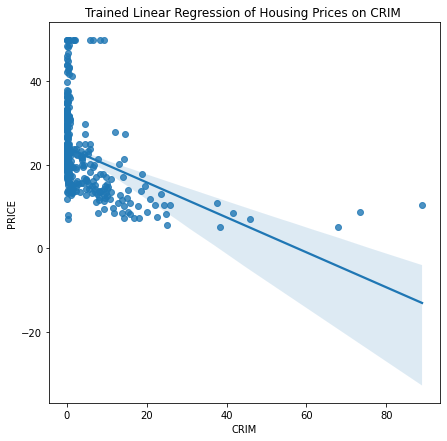

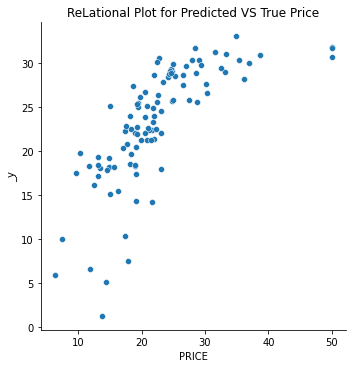

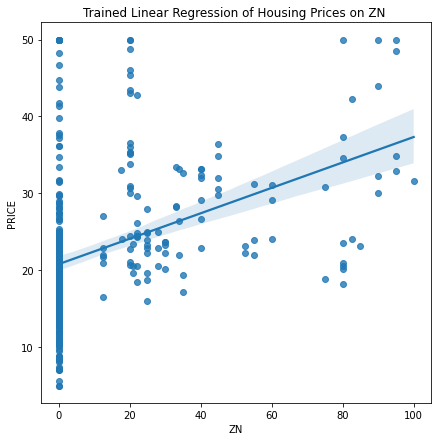

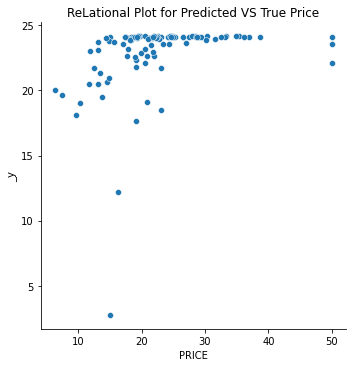

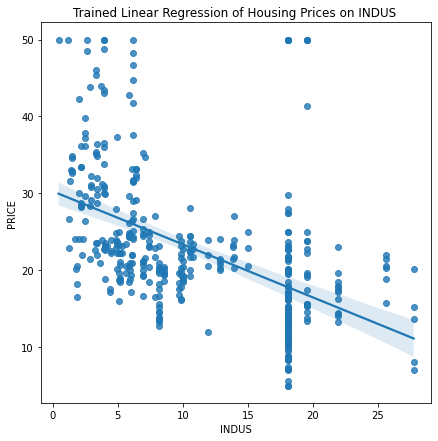

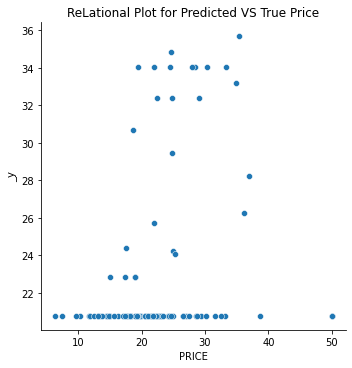

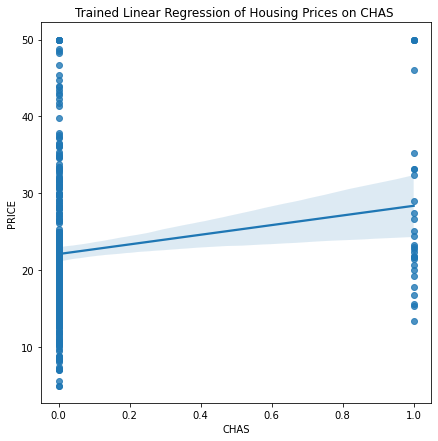

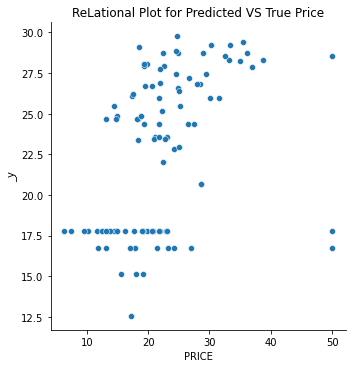

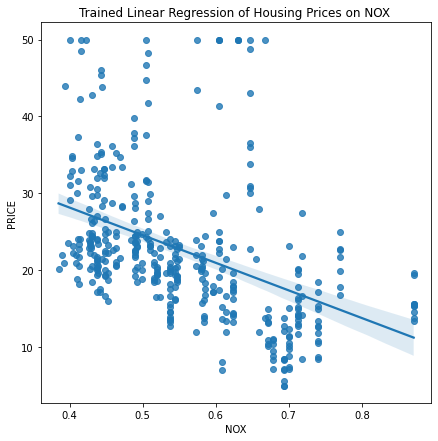

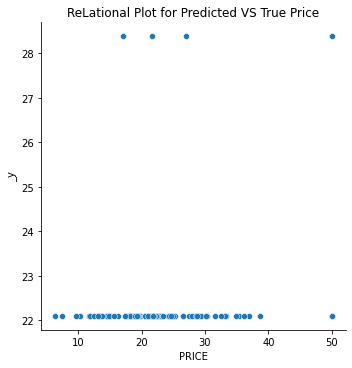

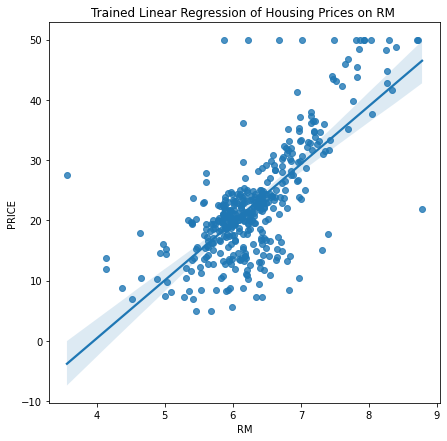

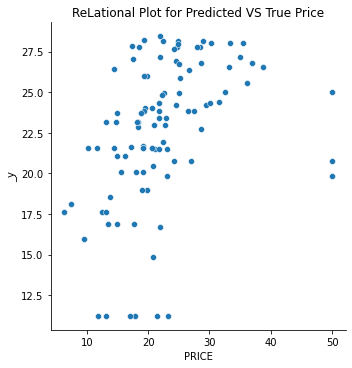

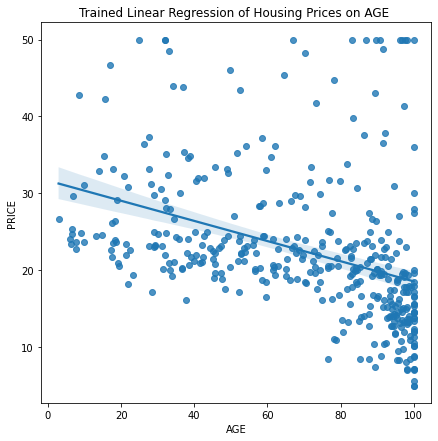

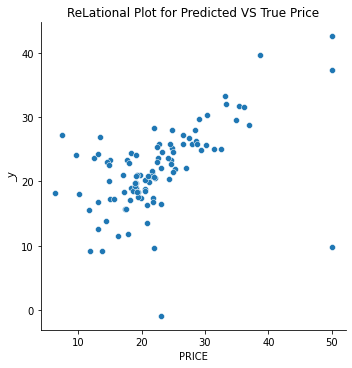

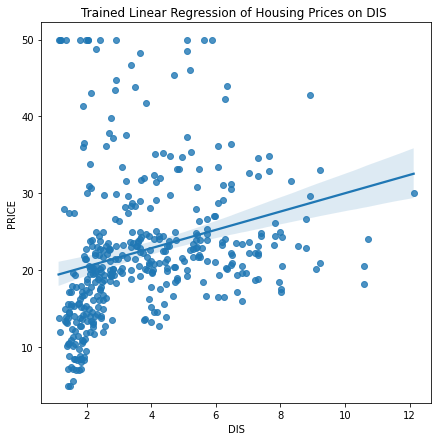

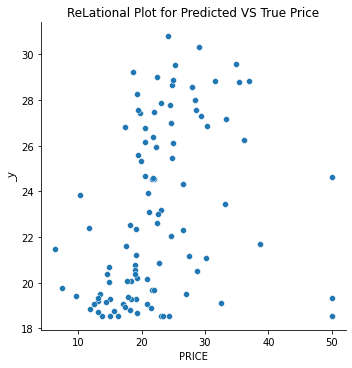

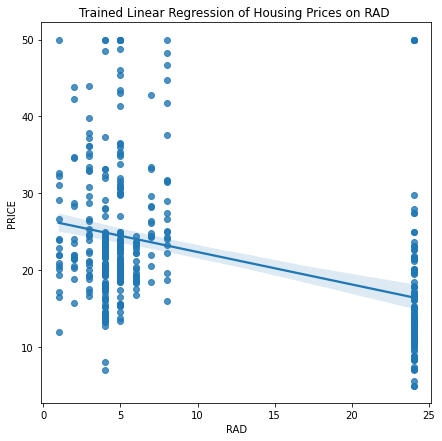

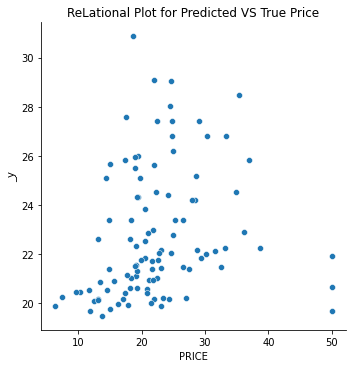

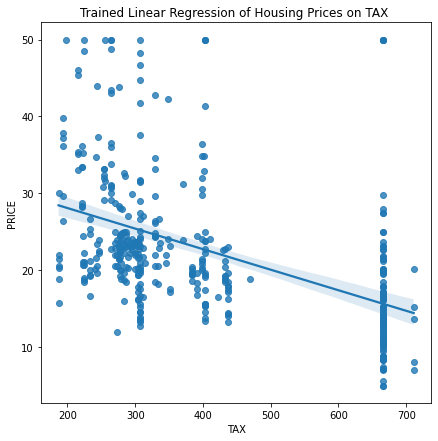

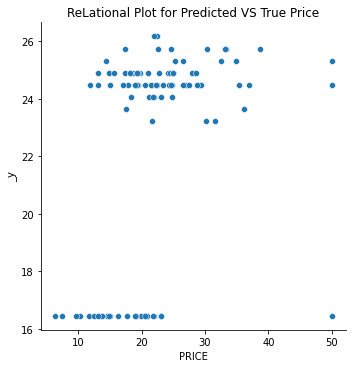

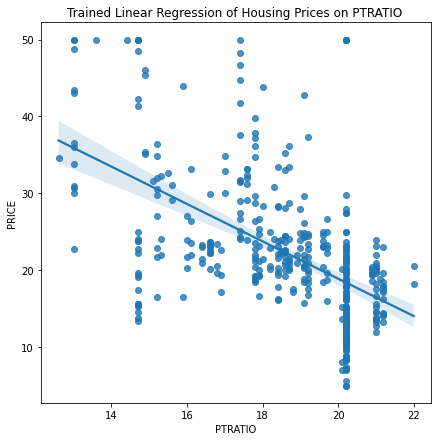

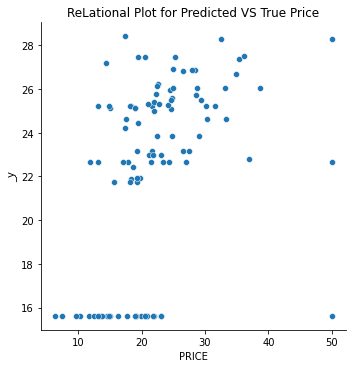

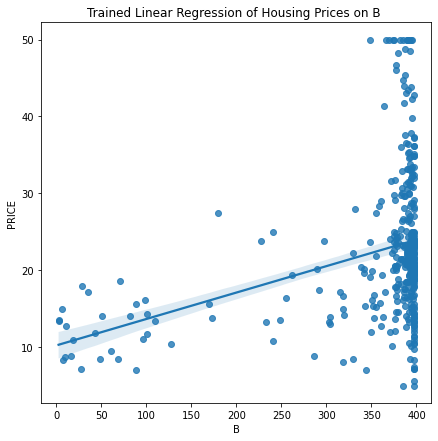

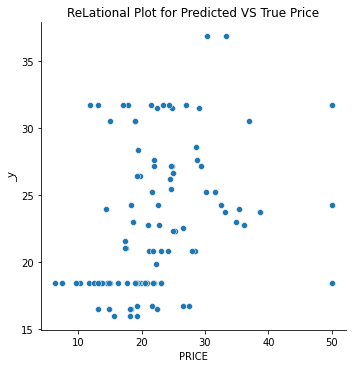

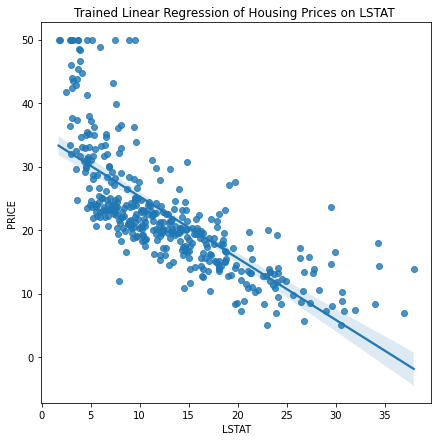

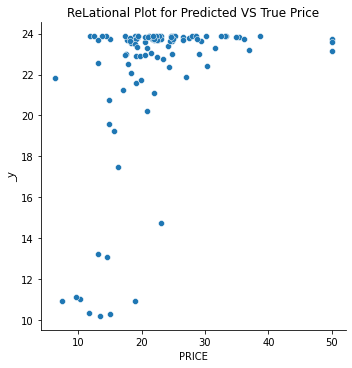

In [75]:
features_list = ['CRIM', 'ZN' ,'INDUS' ,'CHAS' ,'NOX' ,'RM' ,'AGE', 'DIS' ,'RAD' ,'TAX' ,'PTRATIO','B' ,'LSTAT']
dict_mse = {}

for feature in features_list:
  regress_feature(feature = feature)

  y_hat = model.predict(test_df[[feature]])
  print("The prediced House price given feature {} are:\n {} \n".format(feature, y_hat))

  mse = mean_squared_error(y_true = test_df['PRICE'], y_pred = y_hat)
  print("The Mean Squared Error is: ", mse)
  mae = mean_absolute_error(y_true=test_df['PRICE'], y_pred= y_hat)
  print("The Mean Absolute Error is: ", mae)

  print("==="*30)
  
  dict_mse[feature] = [mse, mae]

# Sort the dictionary items by both MSE and MAE in descending order,
#The key argument in the sorted() function specifies a custom sorting function,
# lambda item: (item[1][0], item[1][1]), that takes a tuple item and returns a tuple of 
#values used for sorting. The values used for sorting in this case are the first and second elements 
#of the value in the dictionary, which correspond to mse and mae.
sorted_dict_mse = sorted_dict_mse = dict(sorted(dict_mse.items(), key=lambda x: (x[1][0], x[1][1])))

# Print the sorted dictionary
for key, value in sorted_dict_mse.items():
  print(key, value)
  print("\n")



## <font color='#31394d'> Cross Validation </font>

Cross validation is an alternative approach to evaluate out-of-sample model performance. To do cross validation, we simply split the data into *K* folds, and for each fold, we train the model on the data from the *K*-1 remaining folds and evaluate on the one that was not included in the training set. That way, we get out-of-sample predictions and errors for every data point, so we don't rely on a single test set. 

For example, a 5 fold cross validation would look like this:

![title](media/cross_validation.png)

The `cross_val_score` function in `scikit-learn` computes your choice of evaluation metric for each fold. To use this function, we first need to see what "scoring methods" are available:

In [59]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Looks like it defines the evaluation metrics such that "bigger is better". So, if we want to use MSE, for example, we need to choose "neg_mean_squared_error" (the negative MSE)...

In [61]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(estimator=model, X=boston_df[['RM']], y=boston_df['PRICE'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([ -10.11581024,  -33.25013827,  -39.73491255, -106.6526283 ,
        -73.84557039])

Note that running this function again will produce different results since the data are split into folds randomly each time the function is called. 

The cross-validated MSE for the simple regression model of price against room is therefore:

In [62]:
-cv_scores.mean()

52.71981195000427

In [71]:
dict_cv = {}

for feature in features_list:
  cv_scores = cross_val_score(estimator=model, X=boston_df[[feature]], y=boston_df['PRICE'], scoring="neg_mean_squared_error", cv=5)
  print("{}: {}\n".format(feature,cv_scores))
  
  dict_cv[feature] = -cv_scores.mean()
  
print("==="*20)
sorted_dict_cv = sorted(dict_cv.items(), key= lambda item:item[1])

for key, value in dict(sorted_dict_cv).items():
    print(key, value)



CRIM: [ -37.29856463  -90.26649703 -136.57347572  -77.11581342  -51.62475583]

ZN: [ -37.23241771  -81.19242897 -130.12009816  -92.82963756  -67.53004856]

INDUS: [ -45.26539899  -91.53883419 -107.69871334  -92.94525095  -36.59082976]

CHAS: [ -34.68888836  -97.50995566 -155.97532327  -90.94481309  -84.80521683]

NOX: [ -45.21119708  -82.50966219 -130.81902305  -83.14121895  -46.32541572]

RM: [ -10.11581024  -33.25013827  -39.73491255 -106.6526283   -73.84557039]

AGE: [ -32.98267334  -86.4174086  -136.00184794  -93.21535661  -58.82775103]

DIS: [ -40.72223372  -90.98466461 -153.70110631  -97.32016083  -73.85225599]

RAD: [ -43.63784578  -89.35094668 -133.30313922  -89.40760893  -40.2080261 ]

TAX: [ -50.8456349   -83.67532938 -110.80462379  -91.63760449  -27.09855527]

PTRATIO: [-35.50378502 -93.26832479 -93.04850147 -84.69913115 -43.01807194]

B: [ -33.49897874  -89.67851794 -142.25504132 -109.40888932  -41.91696804]

LSTAT: [-23.55825    -41.82157437 -73.99360893 -50.50118016 -23.2

### The LSTAT - % lower status of the population is the best as it has the lowest loss

🚀 <font color='#d9c4b1'> Exercise: </font> Compute the CV score for price regressed against another feature in the dataset. Which model is best?

If we want to get more information about each split, we can use the `cross_validate` function instead. It also accepts multiple scoring functions/evaluation metrics. Think of `cross_val_score` as the simplified version of `cross_validate`...

In [69]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_info = cross_validate(estimator=model, X=boston_df[['RM']], y=boston_df['LSTAT'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_df = pd.DataFrame(cv_info)
cv_df

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE
0,0.003825,0.004827,-30.068867,-31.915628,-4.523137,-4.433984
1,0.002225,0.001655,-22.780676,-32.908071,-4.169308,-4.545942
2,0.001931,0.001657,-30.045458,-32.066429,-3.837385,-4.461230
3,0.002111,0.001868,-15.215115,-33.661780,-3.347128,-4.608460
4,0.001935,0.001534,-16.619839,-33.419894,-3.288633,-4.571049
5,0.001971,0.001570,-18.072243,-33.299772,-3.625559,-4.557685
6,0.001882,0.002572,-30.012315,-32.174852,-5.033137,-4.470092
7,0.002973,0.002425,-81.493551,-26.428596,-7.699098,-4.025299
8,0.002816,0.002243,-86.530957,-26.329232,-8.071917,-3.955090
9,0.001910,0.001549,-14.878636,-33.580828,-2.988054,-4.574930


We get results for each one of the folds:
- fit time = how long it took to train the model
- score time = how long it took to make predictions and compute the score
- test and train scores are given for each one of the scoring functions